# FWHM_X

# Preparazione Dati

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import functions as f

Importo file e aggiungo una colonna _check_ che alterna True e False

In [2]:
data = pd.read_csv('data_fs.dat', delim_whitespace=True, decimal=",")
f.add_bool(data)

In [3]:
data_int = data[data['check'] == True]
data_check = data[data['check'] == False]

"Filtro" i dati rimuovendo i punti sul bordo, ovvero quelli con |x| o |y| > 0.3

In [4]:
mask = (abs(data_check["x"]) < 0.3) & (abs(data_check["y"]) < 0.3)
data_mask = data_check[mask]

---------------

# Interpolazione

-------

## Interp2d


### full width half maximum (x)

In [5]:
f_int_fwhmx = f.int_lin(data_int, "fwhm_x")
f_check_fwhmx = f.int_lin(data_check, "fwhm_x")

d_fwhmx = f.delta(data_check, f_int_fwhmx, f_check_fwhmx)
d_fwhmx_mask = f.delta(data_mask, f_int_fwhmx, f_check_fwhmx)

/Users/eleonoragatti/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=12,11 m=85 fp=0.000001 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/Users/eleonoragatti/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,13 m=84 fp=0.000002 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


#### Descrizione dei grafici
- Errore assoluto tra dati ricavati dall'interpolazione e dati esatti
- Errore assoluto tra dati ricavati dall'interpolazione e dati esatti espresso in scala logaritmica
- Contour plot della differenza in scala logaritmica

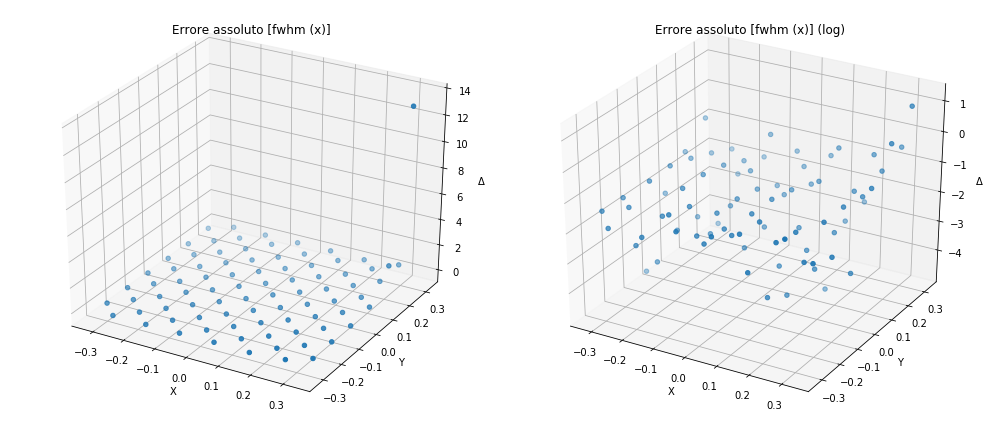

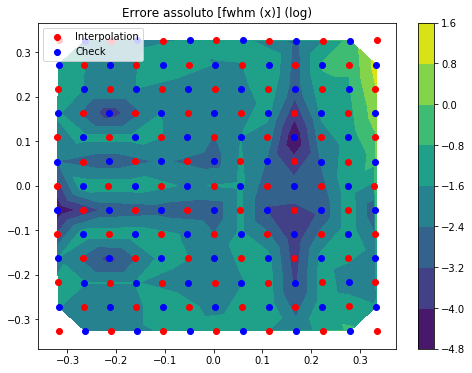

In [6]:
f.graph(data_check, data_int, d_fwhmx, "fwhm (x)")

Si nota che i dati con un errore maggiore sono quelli sul bordo, proviamo perciò a escludere i punti di bordo in fase di verifica, avendoli però considerati in fase di interpolazione.

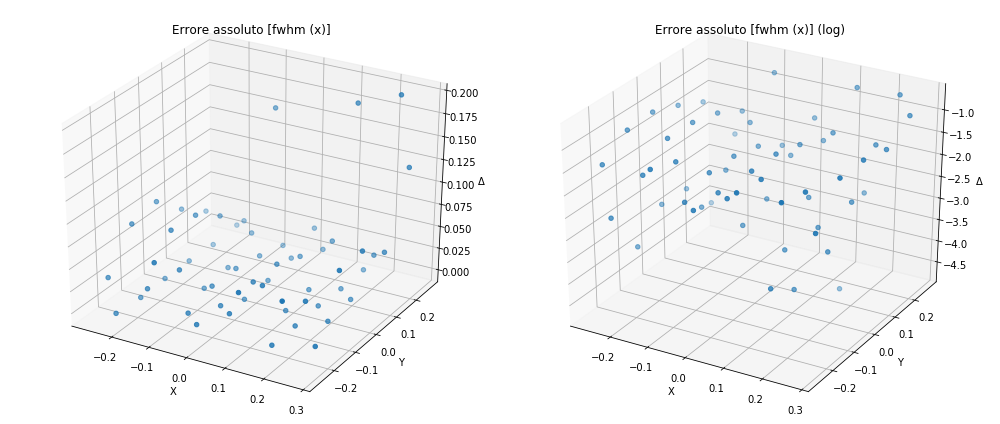

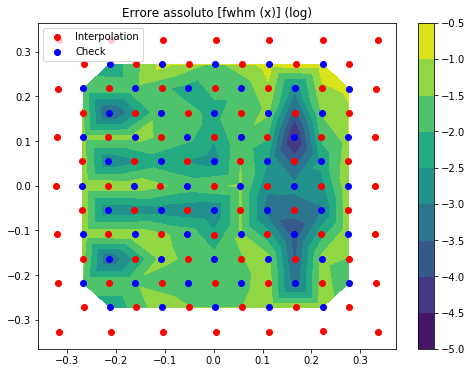

In [7]:
f.graph(data_mask, data_int, d_fwhmx_mask, "fwhm (x)")

-------

## Curve Fit

### full width half maximum (x)

In [8]:
X = [data["x"], data["y"]]
X_check = [data_check["x"], data_check["y"]]
X_check_mask = [data_mask["x"], data_mask["y"]]
X_int = [data_int["x"], data_int["y"]]

In [9]:
popt, pcov = curve_fit(f.func, X_int, data_int["fwhm_x"])
test_func_fwhmx = f.func(X_check, *popt)

popt1, pcov1 = curve_fit(f.func, X, data["fwhm_x"])
test_func_fwhmx2 = f.func(X_check, *popt1)

Il seguente grafico confronta l'errore assoluto ottenuto tramite un fit eseguito sui dati completi (in blu) o su metà dei dati (in rosso).

Text(0, 0.5, 'Error')

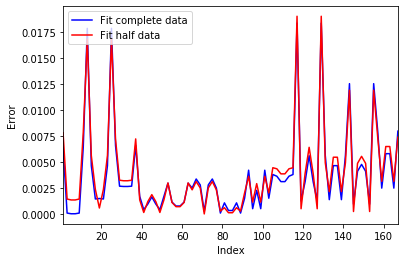

In [10]:
abs(test_func_fwhmx2-data_check["fwhm_x"]).plot(color="blue", label="Fit complete data")
abs(test_func_fwhmx-data_check["fwhm_x"]).plot(color="red", label="Fit half data")
plt.legend(loc='upper left')
plt.xlabel("Index")
plt.ylabel("Error")

Confronto l'errore con quello relativo al metodo di interpolazione `interp2d` (in verde). Sono esclusi i punti di bordo poichè su questi l'errore relativo alla funzione ottenuta tramite `interp2d` risulta essere molto superiore a quello relativo a `curve_fit`, in tali punti l'errore non è comparabile.

Text(0, 0.5, 'Error')

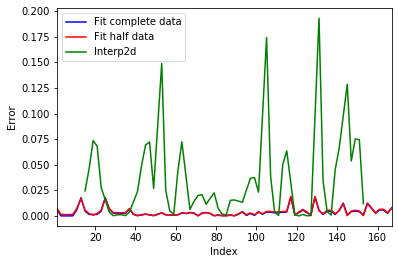

In [11]:
abs(test_func_fwhmx2-data_check["fwhm_x"]).plot(color="blue", label="Fit complete data")
abs(test_func_fwhmx-data_check["fwhm_x"]).plot(color="red", label="Fit half data")
plt.plot(data_mask.index, d_fwhmx_mask, color = "green", label="Interp2d")
plt.legend(loc='upper left')
plt.xlabel("Index")
plt.ylabel("Error")

-------

# LAST BUT NOT LEAST

Plot dell'full width half maximum (x) vera e interpolata/fittata su tutti i punti

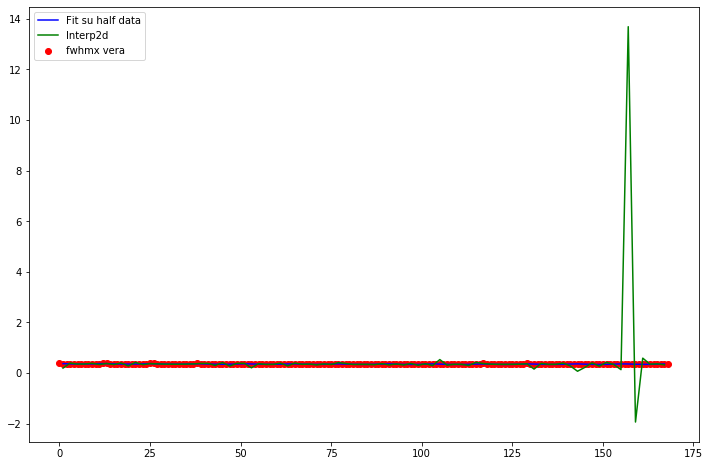

In [12]:
#plt.scatter(data["x"], data["y"], color="orange")
fwhmx = f.val_int(data_check, f_int_fwhmx)
fig = plt.figure(figsize=(12,8))
plt.scatter(data.index, data["fwhm_x"], color="red", label="fwhmx vera")
plt.plot(test_func_fwhmx, label="Fit su half data", color="blue")
plt.plot(data_check.index, fwhmx, label="Interp2d", color="green")
plt.legend()

Ci sono chiaramente alcuni punti problematici per quanto riguarda il metodo di interpolazione `interp2d`

Scelgo una riga di punti e plotto il parametro relativo a quella riga

In [13]:
f.check_graph_row(data, f_int_fwhmx, test_func_fwhmx, test_func_fwhmx2, 'fwhm_x')

Scelgo una colonna di punti e plotto il parametro relativo a quella colonna

In [14]:
f.check_graph_col(data, f_int_fwhmx, test_func_fwhmx, test_func_fwhmx2, 'fwhm_x')

Rimuovo dal dataset la colonna problematica --> la prima da dx

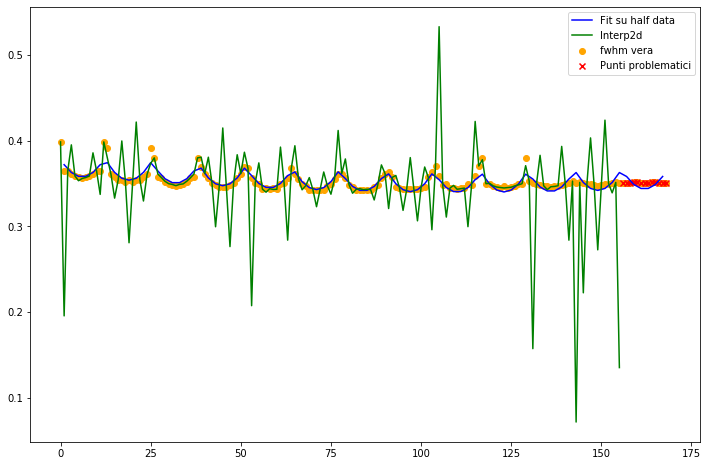

In [15]:
data_noprob = data[data["x"]<0.3]
data_prob = data[data["x"]>0.3]

fwhmx_noprob = f.val_int(data_noprob, f_int_fwhmx)

fig = plt.figure(figsize=(12,8))
plt.scatter(data.index, data["fwhm_x"], marker='o', color="orange", label="fwhm vera")
plt.scatter(data_prob.index, data_prob["fwhm_x"], marker='x', color="red", label="Punti problematici")
plt.plot(test_func_fwhmx, label="Fit su half data", color="blue")
plt.plot(data_noprob.index, fwhmx_noprob, label="Interp2d", color="green")
plt.legend()

In [16]:
#f.check_graph_row(data_noprob, f_int_fwhmx, test_func_fwhmx, test_func_fwhmx2)
#f.check_graph_col(data_noprob, f_int_fwhmx, test_func_fwhmx, test_func_fwhmx2)

-------

## Griddata

La funzione _grid_ prende in input il file di dati e il parametro che vuoi considerare e gli array che formano la griglia su cui interpolare (xpoints, ypoints)

In [17]:
xpoints = f.linspace(data["x"], 500)
ypoints = f.linspace(data["y"], 500)

### Full Width Half Maximum X

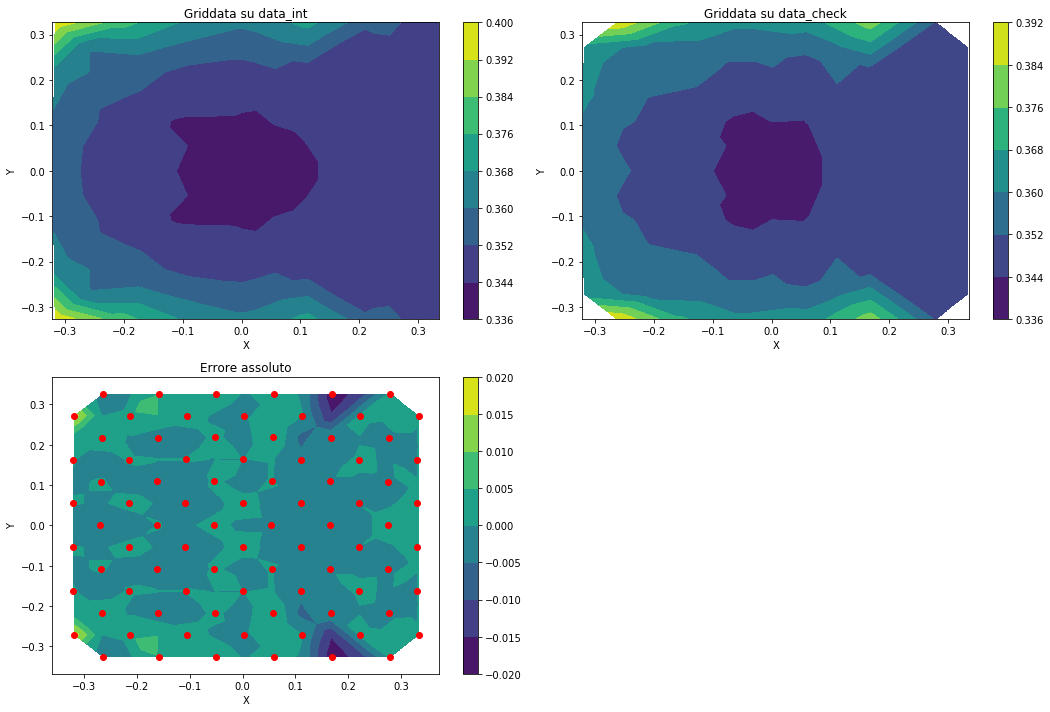

In [18]:
fwhmx2_int = f.grid(data_int, "fwhm_x", xpoints, ypoints)
fwhmx2_check = f.grid(data_check, "fwhm_x", xpoints, ypoints)
f.cgraph(data_check, xpoints, ypoints, fwhmx2_int, fwhmx2_check)